**What does churn stand for?**

Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry ( in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

**Why do businesses want to prevent churn?**

Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

**What metrics do we optimize on while predicting churn?**

F1-score and Recall are good ones, but you can also look at PR curves

# Problem Statement:

I will try to explore the data and try to answer some questions (some questions may or may not be answered due to some reasons) like:

- What's the % of Churn Customers and customers that keep in with the active services?
- Understanding the gender and age range columns.
- Understanding the tenure of customers based on their contract type.
- Take a look at predictor variable (Churn) and understand its interaction with other important variables.
- Churn vs Tenure.
- Are there any patterns in Churn Customers based on ‘Contract Type’?
- Are there any patterns in Churn Customers based on ‘Seniority’?
- Are there any patterns in Churn Customers based on ‘Total Charge’?
- What's the most profitable service types?
- Which features and services are most profitable?

# Model Development

### Import libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

### Import dataset

In [2]:
# df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Dropping columns mentioned to drop in the Assignment pdf.

# df.drop(['Partner', 'MonthlyCharges', 'OnlineSecurity', 'StreamingTV', 'InternetService'], axis='columns',
#       inplace=True)
# df.to_csv("churn_data.csv", index=False)

In [3]:
df = pd.read_csv("churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


### Data Exploration

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0


Data Types of columns

In [6]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

Correlation

In [7]:
df.corr()

,SeniorCitizen,tenure
SeniorCitizen,1.000000,0.016567
tenure,0.016567,1.000000


In [8]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges        11
Churn                0
dtype: int64

We can see that, only column named 'TotalCharges' has nan values.

## Exploratory Data Analysis

In [9]:
#Removing missing values 
df.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1889.50,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,108.15,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,151.65,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

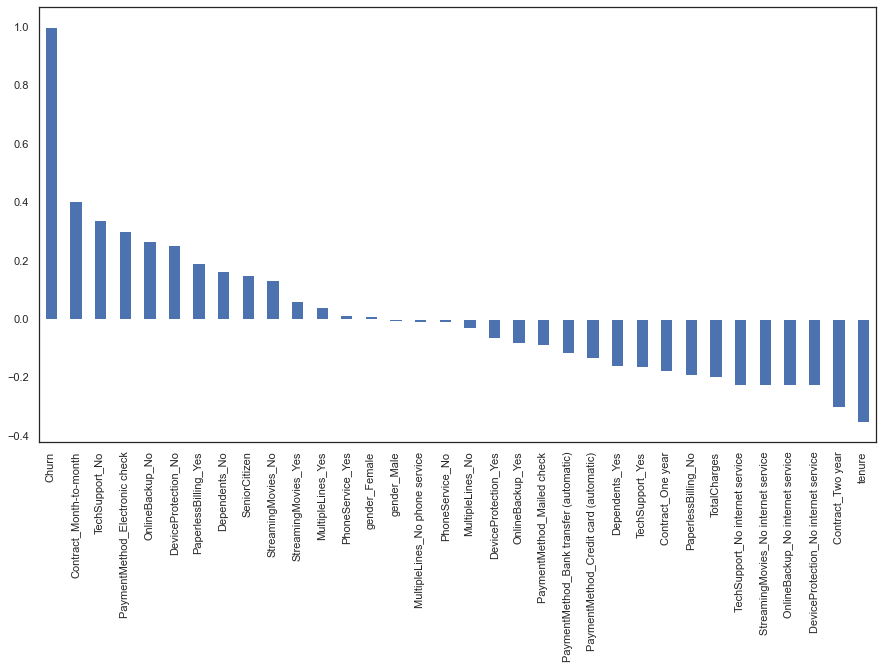

In [10]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**A.) Demographics - Let us first understand the gender, age range.**

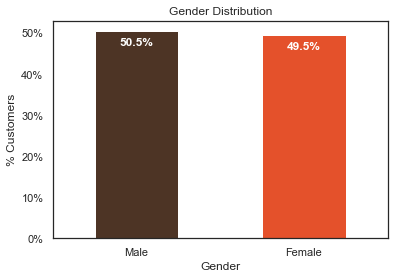

In [11]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**Gender Distribution** - About half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

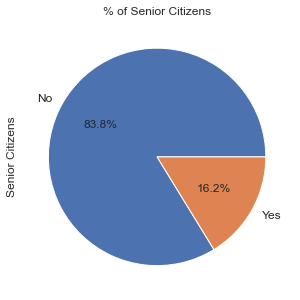

In [12]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

**% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

**B.) Customer Account Information: Let u now look at the tenure, contract**

1. Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

c:\softwares\python3.8.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

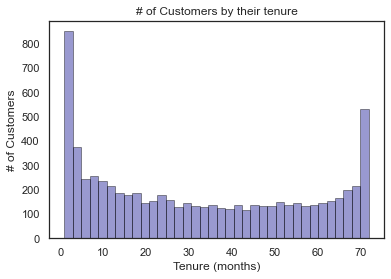

In [13]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

2. Contracts: To understand the above graph, lets first look at the # of customers by different contracts.

Text(0.5, 1.0, '# of Customers by Contract Type')

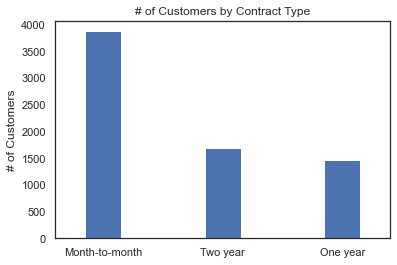

In [14]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

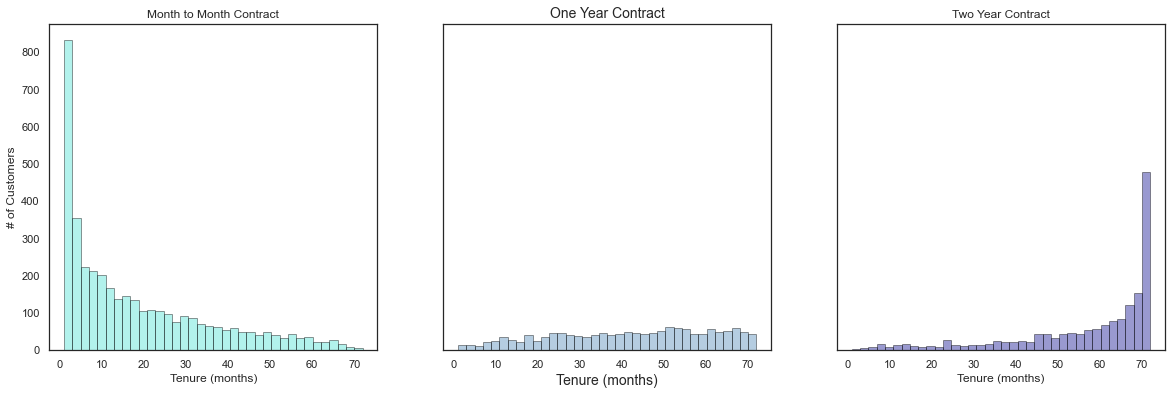

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

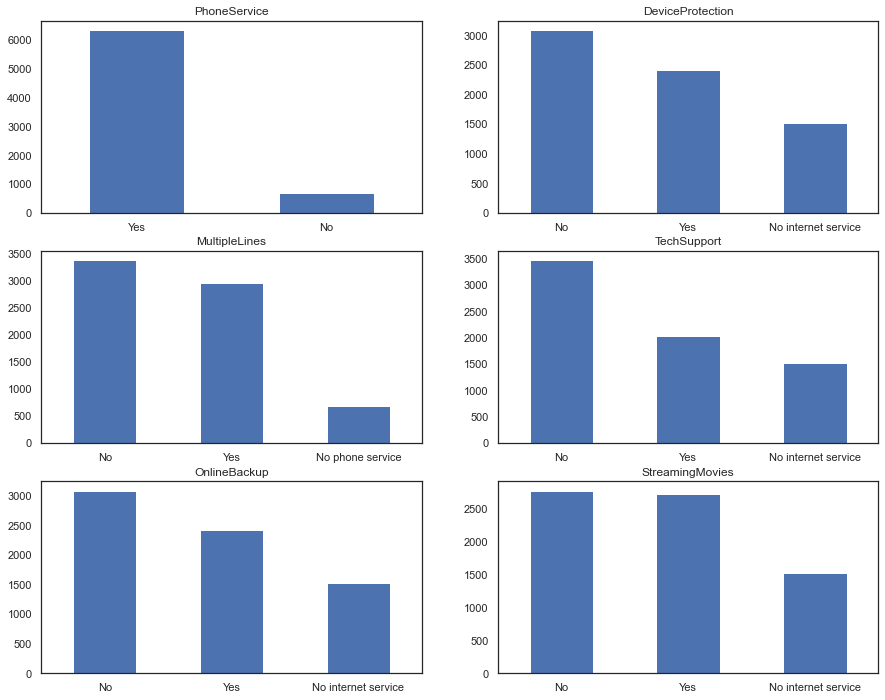

In [16]:
services = ['PhoneService','MultipleLines',
           'OnlineBackup','DeviceProtection','TechSupport', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**C.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.**

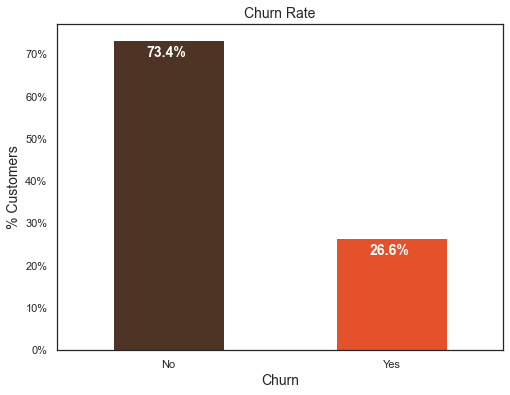

In [17]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

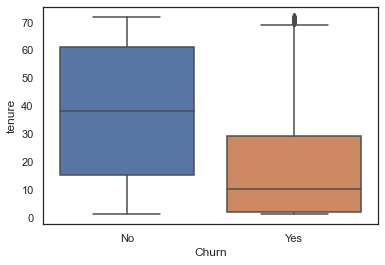

In [18]:
sns.boxplot(x = df.Churn, y = df.tenure)

Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

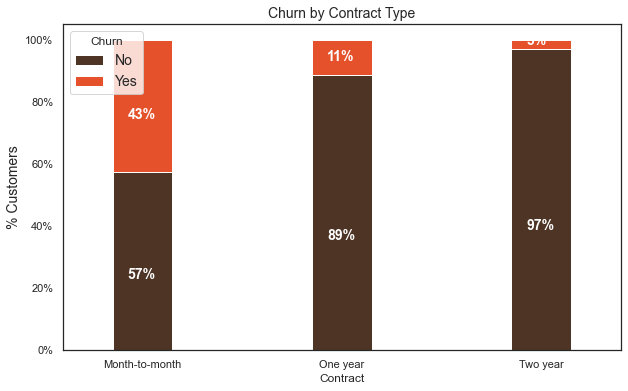

In [19]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

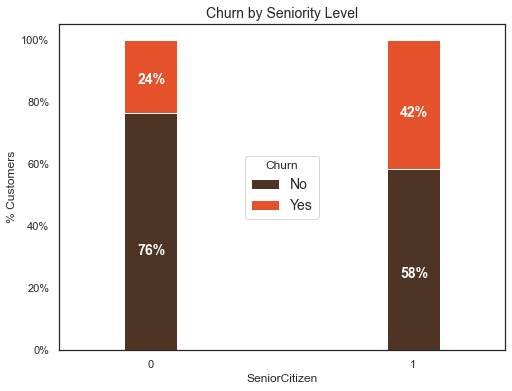

In [20]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of total charges by churn')

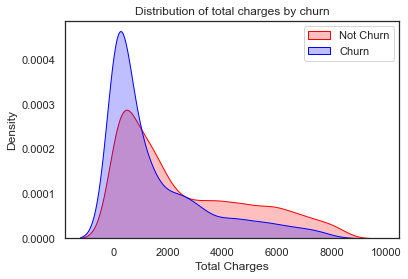

In [21]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## Model Building

In [22]:
df_dummies.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1889.50,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,108.15,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,151.65,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [23]:
from sklearn.tree import DecisionTreeClassifier

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)
predictdt_y = dt_model.predict(X)
accuracy_dt = dt_model.score(X, y)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9972980659840728


Classification Report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y, predictdt_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5163
           1       1.00      0.99      0.99      1869

    accuracy                           1.00      7032
   macro avg       1.00      1.00      1.00      7032
weighted avg       1.00      1.00      1.00      7032



# Handling Missing Values

Observing importance of different features.

Feature: 0, Score: 0.02193
Feature: 1, Score: 0.15125
Feature: 2, Score: 0.35278
Feature: 3, Score: 0.01707
Feature: 4, Score: 0.01985
Feature: 5, Score: 0.01295
Feature: 6, Score: 0.01575
Feature: 7, Score: 0.00275
Feature: 8, Score: 0.00186
Feature: 9, Score: 0.00861
Feature: 10, Score: 0.00213
Feature: 11, Score: 0.01705
Feature: 12, Score: 0.01649
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01299
Feature: 15, Score: 0.01207
Feature: 16, Score: 0.00177
Feature: 17, Score: 0.01250
Feature: 18, Score: 0.03893
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00205
Feature: 21, Score: 0.00780
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01299
Feature: 24, Score: 0.16492
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00410
Feature: 27, Score: 0.01371
Feature: 28, Score: 0.01595
Feature: 29, Score: 0.01091
Feature: 30, Score: 0.01188
Feature: 31, Score: 0.02213
Feature: 32, Score: 0.01485


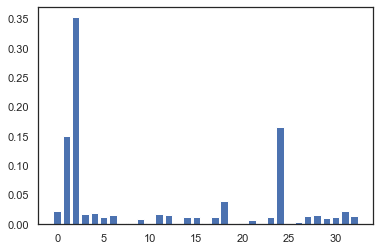

In [26]:
# get importance
importance = dt_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [28]:
X.columns

Index(['SeniorCitizen', 'tenure', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Since, there were missing values (NaNs) only in one column named 'TotalCharges'. And they were negligible in number so we dropped them because they will not affect our objective.

If you want to read **Interpretation of Churn Analysis** please look for the Report.docx file

### Thank you